# Model Exercises

## <font color = "blue">Decision Tree Exercises<font color = "black"> 

**Using the *titanic* data, in your classification-exercises repository, create a notebook, ```model.ipynb``` where you will do the following:**

## Decision Tree: Exercise 1

**What is your baseline prediction? What is your baseline accuracy?** *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*


In [5]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from env import host, password, user 
import numpy as np
import pandas as pd
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix

import prepare
import acquire


import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

In [6]:
#acquiring data
titanic_raw = acquire.get_titanic_data()

#take a look at data
titanic_raw.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def handle_missing_values(df):
    return df.assign(
        embark_town=df.embark_town.fillna('Southampton'),
        embarked=df.embarked.fillna('O'),
    )

def remove_columns(df):
    return df.drop(columns=['deck'])

def encode_embarked(df):
    encoder = LabelEncoder()
    encoder.fit(df.embarked)
    return df.assign(embarked_encode = encoder.transform(df.embarked))

def prep_titanic_data(df):
    df = df\
        .pipe(handle_missing_values)\
        .pipe(remove_columns)\
        .pipe(encode_embarked)
    return df

def train_validate_test_split(df, seed=123):
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed, stratify=df.survived
    )
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed,
        stratify=train_and_validate.survived,
    )
    return train, validate, test

In [8]:
titanic = prep_titanic_data(titanic_raw)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              714 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [9]:
titanic = titanic.drop(columns=['passenger_id','pclass','embarked','embarked_encode', 'age'])

In [10]:
# encode variables
dummies = pd.get_dummies(titanic[['embark_town', 'sex', 'class']], drop_first=True)
titanic = pd.concat([titanic, dummies], axis = 1)

In [11]:
# drop the old columns
titanic = titanic.drop(columns=['embark_town', 'sex', 'class'])
titanic.head()

,survived,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,class_Second,class_Third
0,0,1,0,7.2500,0,0,1,1,0,1
1,1,1,0,71.2833,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,1,0,0,1
3,1,1,0,53.1000,0,0,1,0,0,0
4,0,0,0,8.0500,1,0,1,1,0,1


In [12]:
#split the data
train, validate, test = train_validate_test_split(titanic)

In [13]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [14]:
# We will be attempting to make a Decision Tree Classifier Model that will predict survival on the 
# Titanic that performs better than the baseline.

#target = survived (1)



In [15]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [16]:
train['baseline_assumption_not_survived'] = 0
baseline_accuracy = (train.survived == train.baseline_assumption_not_survived).mean()
baseline_accuracy 

0.6164658634538153

## Decision Tree: Exercise 2

**Fit the decision tree classifier to your training sample and transform.** (i.e. make predictions on the training sample)

In [17]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument

clf1 = DecisionTreeClassifier()

In [18]:
# Setup our X inputs and y target variable for each split
X_train = train.drop(columns=['survived'])
y_train = train.survived # labeled data == supervise algorithm

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [19]:
# Now let's train our model on the training data
# fitting == training the model
clf = clf1.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [20]:
# Visualize the model so it can explain itself!
# dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('tips_decision_tree', view=True)

## Decision Tree: Exercise 3

**Evaluate your in-sample results using the model score, confusion matrix, and classification report.**

In [21]:
# Now we'll make a set of predictions using this trained model
y_pred = clf1.predict(X_train)
pd.Series(y_pred).value_counts()

0    330
1    168
dtype: int64

In [22]:
# Model score on accuracy:
accuracy = clf1.score(X_train,y_train)
accuracy

0.9457831325301205

In [23]:
# confusion matrix
conf = confusion_matrix(y_train, y_pred)
conf

array([[305,   2],
       [ 25, 166]])

In [24]:
class_report = classification_report(y_train, y_pred, output_dict = True)
class_report

{'0': {'precision': 0.9242424242424242,
  'recall': 0.993485342019544,
  'f1-score': 0.9576138147566718,
  'support': 307},
 '1': {'precision': 0.9880952380952381,
  'recall': 0.8691099476439791,
  'f1-score': 0.9247910863509748,
  'support': 191},
 'accuracy': 0.9457831325301205,
 'macro avg': {'precision': 0.9561688311688312,
  'recall': 0.9312976448317616,
  'f1-score': 0.9412024505538233,
  'support': 498},
 'weighted avg': {'precision': 0.9487321580695075,
  'recall': 0.9457831325301205,
  'f1-score': 0.9450251779585028,
  'support': 498}}

In [25]:
pd.DataFrame(class_report).rename({0: 'death', 1: 'survived'}).T

,precision,recall,f1-score,support
0,0.924242,0.993485,0.957614,307.000000
1,0.988095,0.869110,0.924791,191.000000
accuracy,0.945783,0.945783,0.945783,0.945783
macro avg,0.956169,0.931298,0.941202,498.000000
weighted avg,0.948732,0.945783,0.945025,498.000000


## Decision Tree: Exercise 4

**Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**

In [26]:
conf

array([[305,   2],
       [ 25, 166]])

In [27]:
conf_df = pd.DataFrame(conf, columns=['predict_death','predict_survive'], index = ['actual_death', 'actual_survive'])

In [28]:
conf_df

,predict_death,predict_survive
actual_death,305,2
actual_survive,25,166


In [29]:
rubric_df = pd.DataFrame([['true negative','false positive'],['false negative', 'true positive']], columns=['predict_death','predict_survive'], index = ['actual_death', 'actual_survive'])

In [30]:
rubric_df

,predict_death,predict_survive
actual_death,true negative,false positive
actual_survive,false negative,true positive


In [31]:
# create a function to calculate these metrics

def get_metrics_binary(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = clf.score(X_train,y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report



In [32]:
# call the function
report_df = get_metrics_binary(clf1)
report_df


    The accuracy for our model is 0.9458
    True Positive Rate is 0.869, False Positive Rate is 0.00651,
    True Negative Rate is 0.993, False Negative Rate is 0.131
    


,precision,recall,f1-score,support
0,0.924242,0.993485,0.957614,307.000000
1,0.988095,0.869110,0.924791,191.000000
accuracy,0.945783,0.945783,0.945783,0.945783
macro avg,0.956169,0.931298,0.941202,498.000000
weighted avg,0.948732,0.945783,0.945025,498.000000


## Decision Tree: Exercise 5

**Run through steps 2-4 using a different ```max_depth``` value.**

In [33]:
#clf2
clf2 = DecisionTreeClassifier(max_depth=3)

In [34]:
#fit the model

clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
y_pred = clf2.predict(X_train)

## Decision Tree: Exercise 6

**Which model performs better on your in-sample data?**

In [36]:
report_df = get_metrics_binary(clf2)


    The accuracy for our model is 0.9458
    True Positive Rate is 0.702, False Positive Rate is 0.101,
    True Negative Rate is 0.899, False Negative Rate is 0.298
    


In [37]:
report_df

,precision,recall,f1-score,support
0,0.828829,0.899023,0.862500,307.000000
1,0.812121,0.701571,0.752809,191.000000
accuracy,0.823293,0.823293,0.823293,0.823293
macro avg,0.820475,0.800297,0.807654,498.000000
weighted avg,0.822421,0.823293,0.820430,498.000000


## Decision Tree: Exercise 7

**Which model performs best on your out-of-sample data, the ```validate``` set?**

In [38]:
# get predictions for our validation sets
y_val_pred_1 = clf1.predict(validate)
y_val_pred_2 = clf2.predict(validate)


In [39]:
# get validation accuracy
accuracy_v_1 = clf1.score((validate), validate.survived)
accuracy_v_2 = clf2.score((validate), validate.survived)

In [40]:
accuracy_v_1, accuracy_v_2

(0.43457943925233644, 0.6074766355140186)

In [41]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded = True, filled = True, out_file=None)
graph = graphviz.Source(dot_data)

In [42]:
graph.render('titanic_model_2_tree', view=True)

'titanic_model_2_tree.pdf'

In [43]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded = True, filled = True, out_file=None)
graph = graphviz.Source(dot_data)

In [44]:
graph.render('titanic_model_1_tree', view=True)

'titanic_model_1_tree.pdf'

## <font color = "blue">Random Forest Exercises<font color = "black"> 

## Random Forest: Exercise 1

**Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.**


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=123)

In [47]:
# fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

## Random Forest: Exercise 2

**Evaluate your results using the model score, confusion matrix, and classification report.**



In [48]:
#feature importance
print(rf.feature_importances_)

[0.06892937 0.04922884 0.38141952 0.02427634 0.01283513 0.0326652
 0.34010557 0.02025616 0.07028387 0.        ]


In [49]:
y_pred = rf.predict(X_train)

In [50]:
y_pred_proba = rf.predict_proba(X_train)

## Random Forest: Exercise 3

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**



In [51]:
#Score the model for accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train,y_train)))

Accuracy of random forest classifier on training set: 0.94


In [52]:
cnf_1 = (confusion_matrix(y_train, y_pred))
cnf_1

array([[302,   5],
       [ 23, 168]])

In [53]:
def get_metrics_binary(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = cnf.score(X_train,y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report




get_metrics_binary(rf)


    The accuracy for our model is 0.9438
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    


,precision,recall,f1-score,support
0,0.929231,0.983713,0.955696,307.000000
1,0.971098,0.879581,0.923077,191.000000
accuracy,0.943775,0.943775,0.943775,0.943775
macro avg,0.950165,0.931647,0.939387,498.000000
weighted avg,0.945288,0.943775,0.943186,498.000000


In [54]:
pd.DataFrame(classification_report(y_train,y_pred, output_dict=True)).rename(columns={'0': 'deceased', '1': 'survived'}).T

,precision,recall,f1-score,support
deceased,0.929231,0.983713,0.955696,307.000000
survived,0.971098,0.879581,0.923077,191.000000
accuracy,0.943775,0.943775,0.943775,0.943775
macro avg,0.950165,0.931647,0.939387,498.000000
weighted avg,0.945288,0.943775,0.943186,498.000000


## Random Forest: Exercise 4

**Run through steps increasing your min_samples_leaf and decreasing your max_depth.**



In [55]:
rf1 = RandomForestClassifier(min_samples_leaf=3, max_depth=3,random_state=123)

In [56]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [57]:
#feature importance
print(rf1.feature_importances_)

[0.06267687 0.0187328  0.18693544 0.04129274 0.01346748 0.03571904
 0.4893116  0.01451785 0.13734617 0.        ]


In [58]:
#Score the model for accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf1.score(X_train,y_train)))

Accuracy of random forest classifier on training set: 0.82


In [59]:
def get_metrics_binary(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = cnf.score(X_train,y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report




In [60]:
class_report1 = get_metrics_binary(rf1)


    The accuracy for our model is 0.8193
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    


In [61]:
print('Model #1: min samples 1, max depth 10')
class_report_val = get_metrics_binary(rf)
print('-------------------------------------------\n Model #2: min samples 3, max_depth 3\n')
class_report_val1 = get_metrics_binary(rf1)

Model #1: min samples 1, max depth 10

    The accuracy for our model is 0.9438
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    
-------------------------------------------
 Model #2: min samples 3, max_depth 3


    The accuracy for our model is 0.8193
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    


## Random Forest: Exercise 5

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?**


In [62]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[302,   5],
       [ 23, 168]])

In [63]:
#make a key for reference
rubric_df = pd.DataFrame([['true negative', 'false positive'], ['false negative', 'true positive']], index = ['actual_death','actual_survive'])
rubric_df

,0,1
actual_death,true negative,false positive
actual_survive,false negative,true positive


**After making a few models, which one has the best performance (or closest metrics) on both train and validate?**

In [64]:
# accuracy:
# accuracy = (true positives + true negatives) / (true positives + true negatives + false positives + false negatives)

# True Positive Rate: Sensitivity
# RECALL for the positive class --> out of those that actually survived, how many did we predict would survive?
# TPR = true positives / (true positives + false negatives)
#  If we wanted to calculate PRECISION, it would be true positives / (true positives + false postives)
# Recall being true positives over the sum of the row, precision being the true positive over the sum of the column
# i.e, out of the values we predicted survived, how many were actual survivors?

# False Positive Rate: 
# FPR = false positives / (false positive + true negatives)

# True Negative Rate: Specificity
# Recall for the negative class --> out of those that perished, how many did we predict would not make it?
# TNR = true negatives / (true negatives + false positives)

# False negative rate:
# FNR = false negatives / (false negatives + true positives)

## <font color = 'blue'>K-Nearest Neighbor<font color = 'black'>

**Continue working in your ```model``` file with the *titanic* dataset.**


## KNN: Exercise 1

**Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**



In [65]:
from sklearn.neighbors import KNeighborsClassifier
from acquire import get_titanic_data

In [66]:
#making the model
knn = KNeighborsClassifier()

In [67]:
#train/fit the model
knn_fit = knn.fit(X_train, y_train)

In [68]:
# evaluating the model
y_pred = knn.predict(X_train)


## KNN: Exercise 2

**Evaluate your results using the model score, confusion matrix, and classification report.**


In [69]:
# check model accuracy
accuracy = knn.score(X_train, y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.805


In [70]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       307
           1       0.76      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.80      0.81      0.80       498



In [71]:
#Confusion matrix
conf = confusion_matrix(y_train, y_pred)
conf

array([[263,  44],
       [ 53, 138]])

In [72]:
train.shape

(498, 11)

## KNN: Exercise 3

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**


In [73]:
# call the function
knn_report_df = get_metrics_binary(knn_fit)
knn_report_df


    The accuracy for our model is 0.8052
    True Positive Rate is 0.723, False Positive Rate is 0.143,
    True Negative Rate is 0.857, False Negative Rate is 0.277
    


,precision,recall,f1-score,support
0,0.832278,0.856678,0.844302,307.000000
1,0.758242,0.722513,0.739946,191.000000
accuracy,0.805221,0.805221,0.805221,0.805221
macro avg,0.795260,0.789595,0.792124,498.000000
weighted avg,0.803883,0.805221,0.804278,498.000000


## KNN: Exercise 4

**Run through steps 2-4 setting k to 10**



In [74]:
#making the model
k = 10
knn_10 = KNeighborsClassifier(n_neighbors=k)

In [75]:
#train/fit the model
knn_10_fit = knn_10.fit(X_train, y_train)

In [76]:
# evaluating the model
y_pred_10 = knn_10.predict(X_train)

In [77]:
# check model accuracy
accuracy_10 = knn_10.score(X_train, y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.805


In [78]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       307
           1       0.76      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.80      0.81      0.80       498



In [79]:
#Confusion matrix
conf_10 = confusion_matrix(y_train, y_pred)
conf_10

array([[263,  44],
       [ 53, 138]])

In [80]:
# call the function
knn_10_report_df = get_metrics_binary(knn_10)
knn_10_report_df


    The accuracy for our model is 0.7831
    True Positive Rate is 0.723, False Positive Rate is 0.143,
    True Negative Rate is 0.857, False Negative Rate is 0.277
    


,precision,recall,f1-score,support
0,0.832278,0.856678,0.844302,307.000000
1,0.758242,0.722513,0.739946,191.000000
accuracy,0.805221,0.805221,0.805221,0.805221
macro avg,0.795260,0.789595,0.792124,498.000000
weighted avg,0.803883,0.805221,0.804278,498.000000


## KNN: Exercise 5

**Run through setps 2-4 setting k to 20**



In [81]:
#making the model
k = 20
knn_20 = KNeighborsClassifier(n_neighbors=k)

In [82]:
#train/fit the model
knn_20_fit = knn_20.fit(X_train, y_train)

In [83]:
# evaluating the model
y_pred = knn_20.predict(X_train)

In [84]:
# check model accuracy
accuracy = knn_20.score(X_train, y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.743


In [85]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       307
           1       0.71      0.56      0.63       191

    accuracy                           0.74       498
   macro avg       0.73      0.71      0.72       498
weighted avg       0.74      0.74      0.74       498



In [86]:
#Confusion matrix
conf = confusion_matrix(y_train, y_pred)
conf

array([[263,  44],
       [ 84, 107]])

In [87]:
# get metrics report on k=20
knn_20_report_df = get_metrics_binary(knn_20)
knn_20_report_df


    The accuracy for our model is 0.743
    True Positive Rate is 0.56, False Positive Rate is 0.143,
    True Negative Rate is 0.857, False Negative Rate is 0.44
    


,precision,recall,f1-score,support
0,0.757925,0.856678,0.804281,307.000000
1,0.708609,0.560209,0.625731,191.000000
accuracy,0.742972,0.742972,0.742972,0.742972
macro avg,0.733267,0.708443,0.715006,498.000000
weighted avg,0.739011,0.742972,0.735801,498.000000


## KNN: Exercise 6

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?**


k = 5 has best accuracy of 80.5%
k = 5 has best precision of 83%
k = 5 has best f1 = 84%

In [88]:
knn_report_df

,precision,recall,f1-score,support
0,0.832278,0.856678,0.844302,307.000000
1,0.758242,0.722513,0.739946,191.000000
accuracy,0.805221,0.805221,0.805221,0.805221
macro avg,0.795260,0.789595,0.792124,498.000000
weighted avg,0.803883,0.805221,0.804278,498.000000


In [89]:
knn_10_report_df

,precision,recall,f1-score,support
0,0.832278,0.856678,0.844302,307.000000
1,0.758242,0.722513,0.739946,191.000000
accuracy,0.805221,0.805221,0.805221,0.805221
macro avg,0.795260,0.789595,0.792124,498.000000
weighted avg,0.803883,0.805221,0.804278,498.000000


In [90]:
knn_20_report_df

,precision,recall,f1-score,support
0,0.757925,0.856678,0.804281,307.000000
1,0.708609,0.560209,0.625731,191.000000
accuracy,0.742972,0.742972,0.742972,0.742972
macro avg,0.733267,0.708443,0.715006,498.000000
weighted avg,0.739011,0.742972,0.735801,498.000000


## KNN: Exercise 7

**Which model performs best on our out-of-sample data from ```validate```?**

<font color = 'green'>
Validate Model 1 (k=5) performs best:
accuracy 78.5%
precision 80.7%
F1: 83%


Validate Model 3 (k=20) performs best:  recall 89%

In [91]:
#making the model
knn_val = KNeighborsClassifier()

In [92]:
#train/fit the model
knn_fit_val = knn_val.fit(X_validate, y_validate)
knn_fit_val

KNeighborsClassifier()

In [93]:
# evaluating the model
y_pred_val = knn_val.predict(X_validate)

In [94]:
# check model accuracy
accuracy_val = knn_val.score(X_validate, y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.743


In [95]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       132
           1       0.74      0.67      0.71        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



In [96]:
#Confusion matrix
conf_val = confusion_matrix(y_validate, y_pred_val)
conf_val



array([[113,  19],
       [ 27,  55]])

In [97]:
def get_metrics_binary_val(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = cnf.score(X_validate,y_validate)
    class_report = pd.DataFrame(classification_report(y_validate, y_pred_val, output_dict = True)).T
    conf = confusion_matrix(y_validate, y_pred_val)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our VALIDATE model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report




In [98]:
# call the function
knn_val_report_df = get_metrics_binary_val(knn_fit_val)
knn_val_report_df


    The accuracy for our VALIDATE model is 0.785
    True Positive Rate is 0.671, False Positive Rate is 0.144,
    True Negative Rate is 0.856, False Negative Rate is 0.329
    


,precision,recall,f1-score,support
0,0.807143,0.856061,0.830882,132.000000
1,0.743243,0.670732,0.705128,82.000000
accuracy,0.785047,0.785047,0.785047,0.785047
macro avg,0.775193,0.763396,0.768005,214.000000
weighted avg,0.782658,0.785047,0.782696,214.000000


In [99]:
#making the model
knn_10_val = KNeighborsClassifier(n_neighbors = 10)

In [100]:
#train/fit the model
knn_10_fit_val = knn_10_val.fit(X_validate, y_validate)
knn_10_fit_val

KNeighborsClassifier(n_neighbors=10)

In [101]:
# evaluating the model
y_pred_val_10 = knn_10_val.predict(X_validate)

In [102]:
# check model accuracy
accuracy_val_10 = knn_10_val.score(X_validate, y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.743


In [103]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_validate, y_pred_val_10))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       132
           1       0.74      0.45      0.56        82

    accuracy                           0.73       214
   macro avg       0.73      0.68      0.68       214
weighted avg       0.73      0.73      0.71       214



In [104]:
#Confusion matrix
conf_val_10 = confusion_matrix(y_validate, y_pred_val_10)
conf_val_10

array([[119,  13],
       [ 45,  37]])

In [105]:
# call the function
knn_10_val_report_df = get_metrics_binary_val(knn_10_fit_val)
knn_10_val_report_df


    The accuracy for our VALIDATE model is 0.729
    True Positive Rate is 0.671, False Positive Rate is 0.144,
    True Negative Rate is 0.856, False Negative Rate is 0.329
    


,precision,recall,f1-score,support
0,0.807143,0.856061,0.830882,132.000000
1,0.743243,0.670732,0.705128,82.000000
accuracy,0.785047,0.785047,0.785047,0.785047
macro avg,0.775193,0.763396,0.768005,214.000000
weighted avg,0.782658,0.785047,0.782696,214.000000


In [106]:
#making the model
knn_20_val = KNeighborsClassifier(n_neighbors = 20)

In [107]:
#train/fit the model
knn_20_fit_val = knn_20_val.fit(X_validate, y_validate)
knn_20_fit_val

KNeighborsClassifier(n_neighbors=20)

In [108]:
# evaluating the model
y_pred_val_20 = knn_20_val.predict(X_validate)

In [109]:
# check model accuracy
accuracy_val_20 = knn_20_val.score(X_validate, y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.743


In [110]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_validate, y_pred_val_20))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77       132
           1       0.66      0.35      0.46        82

    accuracy                           0.68       214
   macro avg       0.67      0.62      0.62       214
weighted avg       0.68      0.68      0.65       214



In [111]:
#Confusion matrix
conf_val_20 = confusion_matrix(y_validate, y_pred_val_20)
conf_val_20

array([[117,  15],
       [ 53,  29]])

In [112]:
# call the function
knn_20_val_report_df = get_metrics_binary_val(knn_20_fit_val)
knn_20_val_report_df


    The accuracy for our VALIDATE model is 0.6822
    True Positive Rate is 0.671, False Positive Rate is 0.144,
    True Negative Rate is 0.856, False Negative Rate is 0.329
    


,precision,recall,f1-score,support
0,0.807143,0.856061,0.830882,132.000000
1,0.743243,0.670732,0.705128,82.000000
accuracy,0.785047,0.785047,0.785047,0.785047
macro avg,0.775193,0.763396,0.768005,214.000000
weighted avg,0.782658,0.785047,0.782696,214.000000


## <font color = 'blue'>Logistic Regression Exercises<font color = 'black'>

In these exercises, we'll continue working with the *titanic* dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, **choose a threshold that optimizes for accuracy.**

Do your work for these exercises in either a notebook or a python script named ```model``` within your classification-exercises repository. Add, commit, and push your work.


## Logistic Regression: Exercise 1

**Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?**



In [159]:
import acquire
import prepare
from acquire import get_titanic_data
from prepare import clean_titanic, train_validate_test_split
from sklearn.linear_model import LogisticRegression

In [160]:
df = get_titanic_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [161]:
def clean_titanic(df):
    '''
    clean_titanic will take a dataframe acquired as df and remove columns that are:
    duplicates,
    have too many nulls,
    and will fill in smaller amounts of nulls in embark_town
    encode sex and embark_town columns
    
    return: single cleaned dataframe
    '''
    df.drop_duplicates
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    dummies = pd.get_dummies(df[['embark_town', 'sex']], drop_first=True)    
    dropcols = ['deck', 'class', 'embarked', 'sex', 'embark_town']
    df.drop(columns=dropcols, inplace = True)
    return pd.concat([df, dummies], axis=1)

clean_titan = clean_titanic(df)
clean_titan

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,1,0
3,3,1,1,35.0,1,0,53.1000,0,0,1,0
4,4,0,3,35.0,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,1,0,1,1
887,887,1,1,19.0,0,0,30.0000,1,0,1,0
888,888,0,3,NaN,1,2,23.4500,0,0,1,0
889,889,1,1,26.0,0,0,30.0000,1,0,0,1


In [162]:
titanic = clean_titan.dropna(inplace=True)
titanic

In [163]:
clean_titan.info

<bound method DataFrame.info of      passenger_id  survived  pclass   age  sibsp  parch     fare  alone  \
0               0         0       3  22.0      1      0   7.2500      0   
1               1         1       1  38.0      1      0  71.2833      0   
2               2         1       3  26.0      0      0   7.9250      1   
3               3         1       1  35.0      1      0  53.1000      0   
4               4         0       3  35.0      0      0   8.0500      1   
..            ...       ...     ...   ...    ...    ...      ...    ...   
885           885         0       3  39.0      0      5  29.1250      0   
886           886         0       2  27.0      0      0  13.0000      1   
887           887         1       1  19.0      0      0  30.0000      1   
889           889         1       1  26.0      0      0  30.0000      1   
890           890         0       3  32.0      0      0   7.7500      1   

     embark_town_Queenstown  embark_town_Southampton  sex_male  
0 

In [164]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

train, validate, test = train_validate_test_split(clean_titan,
                                                  target = 'survived',
                                                  seed=123)

In [165]:
#Make new dataframes
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [166]:
# Define the logistic regression model
logit = LogisticRegression(random_state=123)

In [167]:
#  fit the model on train data
logit.fit(X_train[['age', 'fare', 'pclass']], y_train)

LogisticRegression(random_state=123)

In [168]:
# now use the model to make predictions
y_pred = logit.predict(X_train[['age', 'fare', 'pclass']])

In [169]:
#take a look at predictions
y_pred_proba = logit.predict_proba(X_train[['age', 'fare', 'pclass']])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['did_not_survive','survived'])
y_pred_proba.head()

,did_not_survive,survived
0,0.732344,0.267656
1,0.587198,0.412802
2,0.388311,0.611689
3,0.421519,0.578481
4,0.428695,0.571305


In [170]:
# classification report
logit_cr = (classification_report(y_train, y_pred))
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       237
           1       0.66      0.52      0.59       162

    accuracy                           0.70       399
   macro avg       0.69      0.67      0.67       399
weighted avg       0.69      0.70      0.69       399



## LR: Exercise 2

**Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.**



In [193]:
# Make the model
logit2 = LogisticRegression(random_state=123)

In [194]:
#  fit the model on train data
logit2.fit(X_train[['age', 'fare', 'pclass', 'sex_male']], y_train)

LogisticRegression(random_state=123)

In [195]:
# now use the model to make predictions
y_pred = logit2.predict(X_train[['age', 'fare', 'pclass', 'sex_male']])

In [196]:
#take a look at predictions
y_pred_proba = logit2.predict_proba(X_train[['age', 'fare', 'pclass', 'sex_male']])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['did_not_survive','survived'])
y_pred_proba.head()

,did_not_survive,survived
0,0.872486,0.127514
1,0.323882,0.676118
2,0.128001,0.871999
3,0.177899,0.822101
4,0.604015,0.395985


In [197]:
# classification report
logit2_cr = (classification_report(y_train, y_pred))
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       237
           1       0.75      0.70      0.73       162

    accuracy                           0.79       399
   macro avg       0.78      0.77      0.78       399
weighted avg       0.79      0.79      0.79       399



## LR: Exercise 3

**Try out other combinations of features and models.**

In [198]:
clean_titan.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,1,0
3,3,1,1,35.0,1,0,53.1000,0,0,1,0
4,4,0,3,35.0,0,0,8.0500,1,0,1,1


In [199]:
# Make the model
logit3 = LogisticRegression(random_state=123)

In [200]:
#  fit the model on train data
logit3.fit(X_train[['alone', 'pclass', 'sex_male']], y_train)

LogisticRegression(random_state=123)

In [201]:
# now use the model to make predictions
y_pred = logit3.predict(X_train[['alone', 'pclass', 'sex_male']])

In [202]:
#take a look at predictions
y_pred_proba = logit3.predict_proba(X_train[['alone', 'pclass', 'sex_male']])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['did_not_survive','survived'])
y_pred_proba.head()

,did_not_survive,survived
0,0.886097,0.113903
1,0.430907,0.569093
2,0.103553,0.896447
3,0.230656,0.769344
4,0.549478,0.450522


In [204]:
# classification report
logit3_cr = (classification_report(y_train, y_pred)) 
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       237
           1       0.76      0.68      0.72       162

    accuracy                           0.78       399
   macro avg       0.78      0.77      0.77       399
weighted avg       0.78      0.78      0.78       399



In [218]:

clean_titan.value_counts("embark_town_Queenstown")

embark_town_Queenstown
0    686
1     28
dtype: int64

In [219]:
# Make the model
logit4 = LogisticRegression(random_state=123)

In [220]:
#  fit the model on train data
logit4.fit(X_train[['embark_town_Queenstown','sex_male']], y_train)

LogisticRegression(random_state=123)

In [221]:
# now use the model to make predictions
y_pred = logit4.predict(X_train[['embark_town_Queenstown', 'sex_male']])

In [222]:
#take a look at predictions
y_pred_proba = logit4.predict_proba(X_train[['embark_town_Queenstown', 'sex_male']])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['did_not_survive','survived'])
y_pred_proba.head()

,did_not_survive,survived
0,0.782955,0.217045
1,0.251680,0.748320
2,0.251680,0.748320
3,0.251680,0.748320
4,0.782955,0.217045


In [223]:
# classification report
logit4_cr = (classification_report(y_train, y_pred))
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       237
           1       0.76      0.68      0.72       162

    accuracy                           0.78       399
   macro avg       0.78      0.77      0.77       399
weighted avg       0.78      0.78      0.78       399



## LR: Exercise 4

**Use you best 3 models to predict and evaluate on your validate sample.**



In [224]:
print(logit_cr)
print(logit2_cr)
print(logit3_cr)
print(logit4_cr)

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       237
           1       0.66      0.52      0.59       162

    accuracy                           0.70       399
   macro avg       0.69      0.67      0.67       399
weighted avg       0.69      0.70      0.69       399

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       237
           1       0.75      0.70      0.73       162

    accuracy                           0.79       399
   macro avg       0.78      0.77      0.78       399
weighted avg       0.79      0.79      0.79       399

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       237
           1       0.76      0.68      0.72       162

    accuracy                           0.78       399
   macro avg       0.78      0.77      0.77       399
weighted avg       0.78      0.78      0.78       399

              preci

## LR: Exercise 5

**Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?**



## Bonus 1:

**How do different strategies for handling the missing values in the age column affect model performance?**



## Bonus 2:

**How do different strategies for encoding sex affect model performance?**


## Bonus 3: 

**```scikit-learn```'s ```LogisticRegression``` classifier is actually applying ```a regularization penalty to the coefficients``` by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the ```C``` hyper parameter. Small values of ```C``` correspond to a larger penalty, and large values of ```C``` correspond to a smaller penalty.**

**Try out the following values for ```C``` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.**

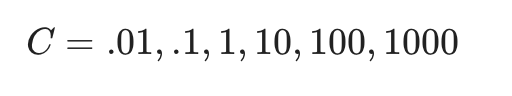

## Bonus Bonus

 **how does scaling the data interact with your choice of ```C```?**